In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

3


In [4]:
#reading dataset into variable
data=pd.read_csv('housing_data.csv')

# Calculating mean of the Sale Price with respect to Condition of the House

<ipython-input-5-2a85edcbfb48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['condition sale'][data['Condition of the House']==str(i)]= data['Sale Price'][data['Condition of the House']==str(i)].mean()
<ipython-input-5-2a85edcbfb48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['condition sale'][data['Condition of the House']==str(i)]= data['Sale Price'][data['Condition of the House']==str(i)].mean()


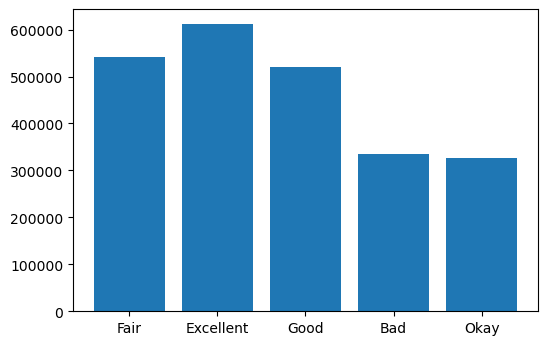

In [5]:
data['condition sale']=0
for i in data['Condition of the House'].unique():
    data['condition sale'][data['Condition of the House']==str(i)]= data['Sale Price'][data['Condition of the House']==str(i)].mean()
    
plt.figure(dpi=100)
plt.bar(data['Condition of the House'].unique(),data['condition sale'].unique())
plt.show()

In [6]:
len(data['condition sale'].unique())

5

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [8]:
# Calculating mean with respect to two columns 
data['zip_condition_sale']=0

c='Condition of the House'
z='Zipcode'

for i in data[c].unique():
    for j in data[z].unique():
        data['zip_condition_sale'][(data[c]==str(i))& data[z]==j] = data['Sale Price'][(data[c]==str(i))& data[z]==j].mean()
len(data['zip_condition_sale'].unique())       

<ipython-input-8-3766f24d8194>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zip_condition_sale'][(data[c]==str(i))& data[z]==j] = data['Sale Price'][(data[c]==str(i))& data[z]==j].mean()


1

# Using advance Pandas Functions for data manipulation

In [9]:
#Calculating mean with respect to two columns by using PANDAS groupby() function

zip_condition_sale=data.groupby(['Condition of the House','Zipcode'])['Sale Price'].mean()

zip_condition_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [10]:
#using PANDAS pivot_table()
zip_condition_sale2= pd.pivot_table(data,index=['Condition of the House','Zipcode'],values=['Sale Price'],aggfunc=np.mean)
zip_condition_sale2

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [11]:
#use of PANDAS pivot_table with "columns" attribute
zip_condition_sale3= pd.pivot_table(data,index=['Condition of the House'],columns=['Zipcode'],values=['Sale Price'],aggfunc=np.mean)
zip_condition_sale3

Sale Price                                \
Zipcode                       98001.0        98002.0        98003.0   
Condition of the House                                                
Bad                               NaN            NaN            NaN   
Excellent               242543.333333  221641.086957  370680.000000   
Fair                    292720.693878  258886.824324  299280.111732   
Good                    252744.618557  219285.813725  280959.136842   
Okay                    356070.000000            NaN  235500.000000   

                                                                    \
Zipcode                      98004.0        98005.0        98006.0   
Condition of the House                                               
Bad                     1.500000e+06            NaN  372500.000000   
Excellent               1.236365e+06  831950.000000  806405.000000   
Fair                    1.527265e+06  866801.200000  995876.750000   
Good                    1.145915e+06  766939.650602  729722.741294   
Okay                    4.250000e+05  577750.000000  547500.000000   

                                                                     \
Zipcode                       98007.0        98008.0        98010.0   
Condition of the House                                                
Bad                               NaN            NaN            NaN   
Excellent               697475.000000  731996.200000  319564.300000   
Fair                    633854.166667  693772.487395  488684.333333   
Good                    594818.726027  588877.388489  342907.545455   
Okay                              NaN            NaN            NaN   

                                       ...                                \
Zipcode                       98011.0  ...        98146.0        98148.0   
Condition of the House                 ...                                 
Bad                     270000.000000  ...  255000.000000  275250.000000   
Excellent               484542.857143  ...  462222.222222  289475.000000   
Fair                    497734.525641  ...  319339.477612  287352.000000   
Good                    461779.032258  ...  487384.542373  279666.666667   
Okay                              NaN  ...  224111.111111  250750.000000   

                                                                     \
Zipcode                       98155.0        98166.0        98168.0   
Condition of the House                                                
Bad                     305000.000000            NaN   79500.000000   
Excellent               421235.480769  495068.500000  250203.666667   
Fair                    440282.136691  480877.866667  241899.226804   
Good                    386593.133929  452418.500000  248558.714286   
Okay                    360183.333333  216562.500000  180938.888889   

                                                                     \
Zipcode                       98177.0        98178.0        98188.0   
Condition of the House                                                
Bad                               NaN            NaN            NaN   
Excellent               896631.272727  297521.739130  285363.636364   
Fair                    649681.238411  309410.492386  290005.931373   
Good                    666575.487805  330841.875000  286741.304348   
Okay                              NaN  175000.000000            NaN   

                                                      
Zipcode                       98198.0        98199.0  
Condition of the House                                
Bad                               NaN            NaN  
Excellent               321523.500000  933898.285714  
Fair                    294161.875000  760497.393939  
Good                    315430.528846  796381.090909  
Okay                    270532.500000            NaN  

[5 rows x 70 columns]

In [12]:
#using PANDAS map() function
data['Condition of the House']= data['Condition of the House'].map({"Good":"1","Excellent":"3","Bad":"0","Fair":"1","Okay":"0"})
data['Condition of the House']

0        1
1        1
2        1
3        3
4        1
        ..
21608    1
21609    1
21610    1
21611    1
21612    1
Name: Condition of the House, Length: 21613, dtype: object

In [15]:
data['Condition of the House'].unique()

array(['1', '3', '0'], dtype=object)

In [16]:
#Use of Map() function to extract year from given date
def year(value):
    return value.split()[-1]
data['Year_sold']=data['Date House was Sold'].map(year)
data['Year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: Year_sold, dtype: object